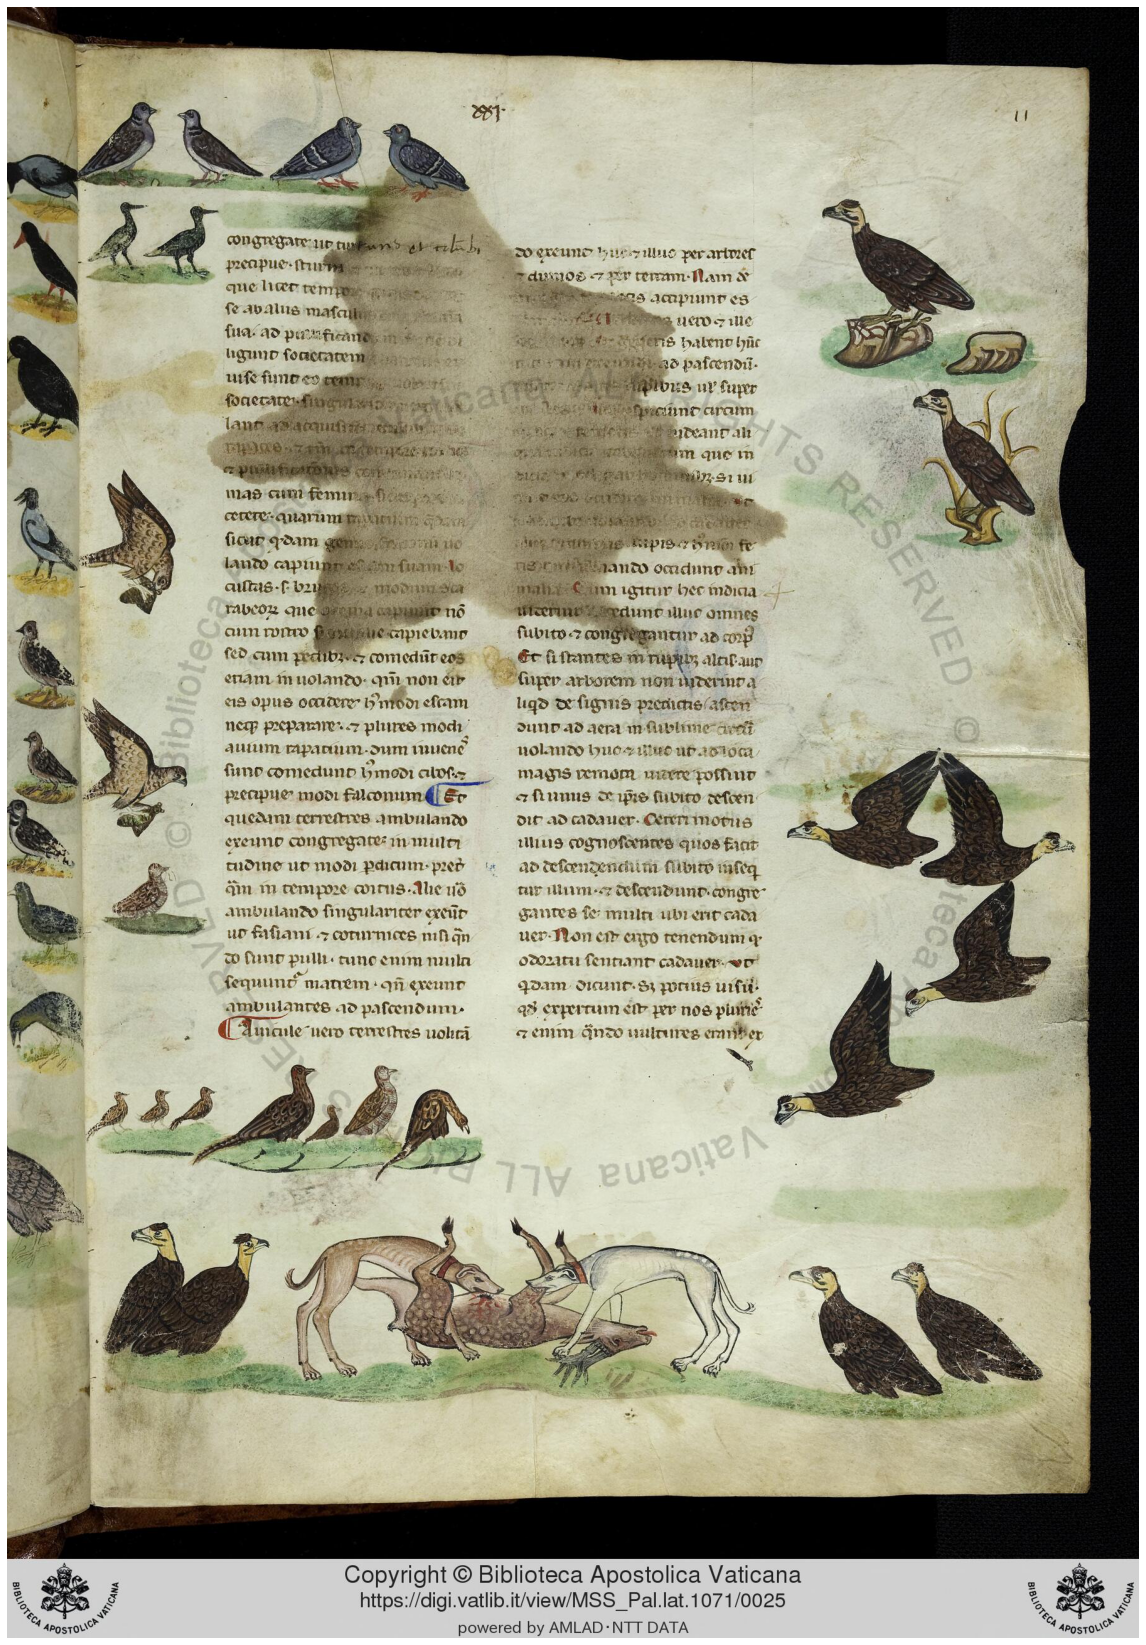

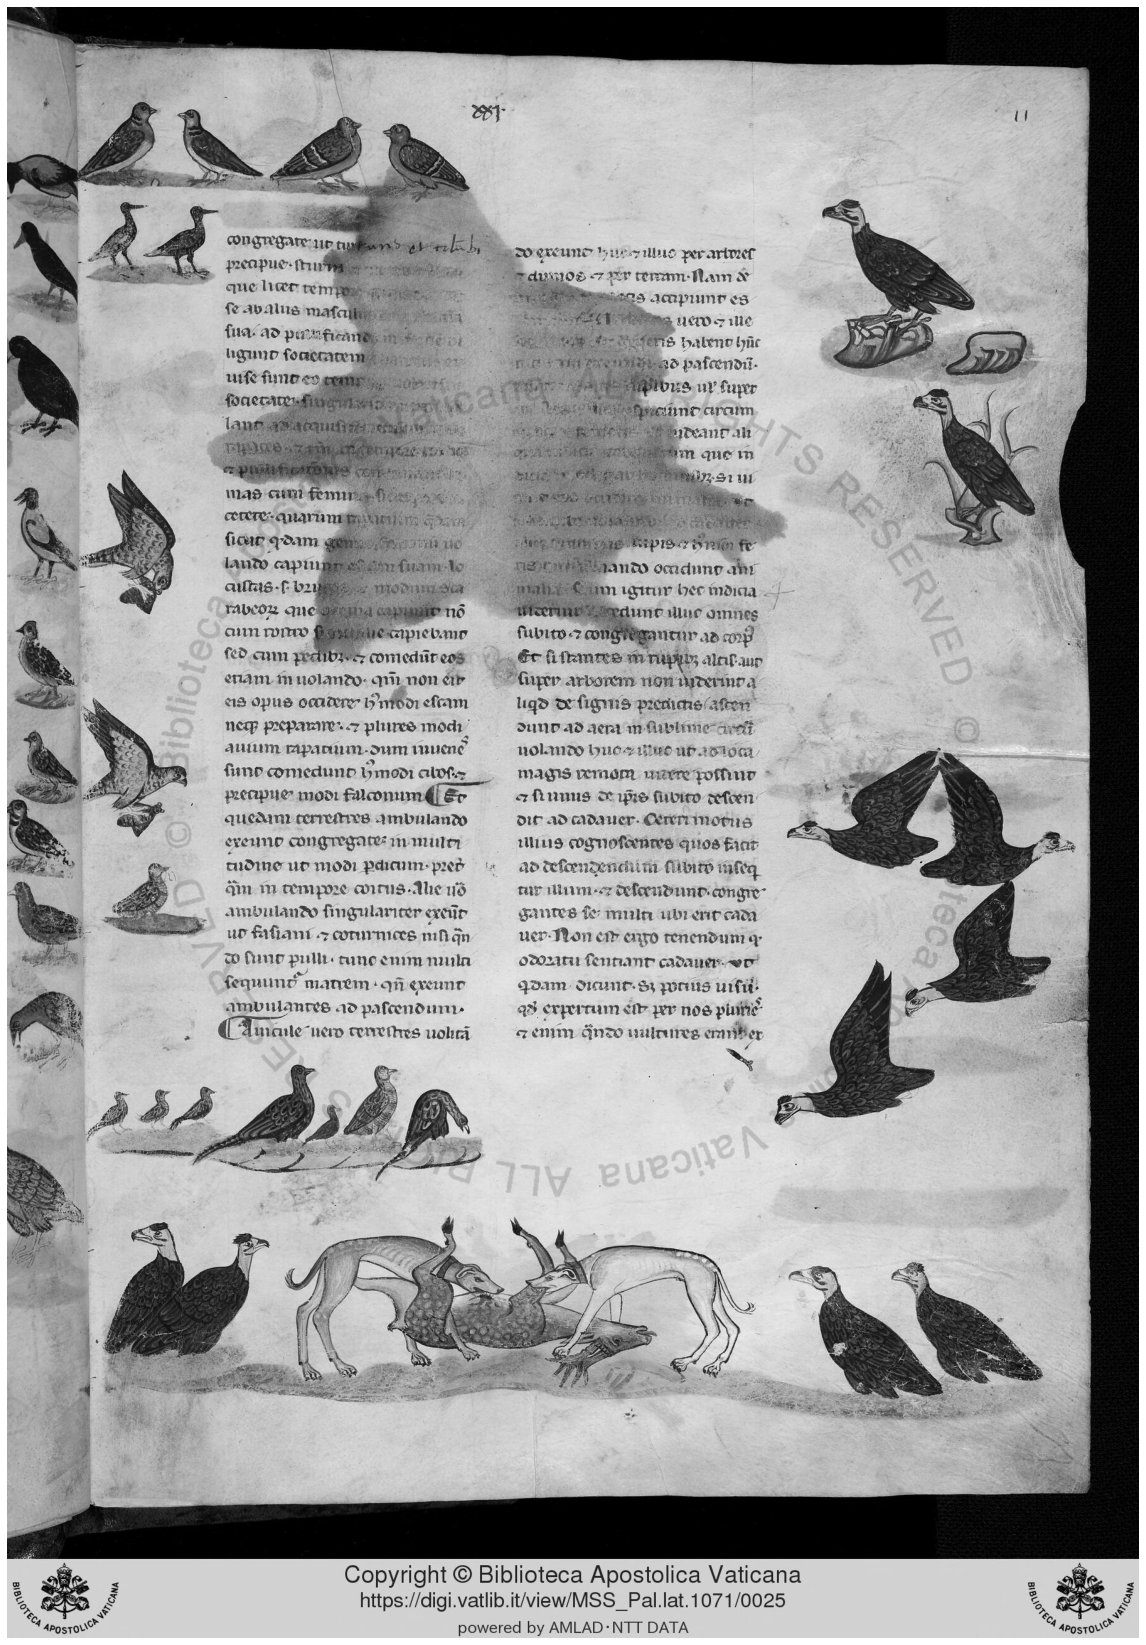

In [1]:
from utils import *

#img = cv2.imread(os.path.join(img_src,'Pal.lat.1071_0025_fa_0011r_m.jpg'))
img=url_to_image('https://digi.vatlib.it/iiifimage/MSS_Pal.lat.1071/Pal.lat.1071_0025_fa_0011r.jp2/full/full/0/default.jpg')
image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
img_show(image)
img_show(gray,cmap=cm.gray)

In [ ]:
dst = cv2.calcHist(gray, [0], None, [256], [0,256])
figure(figsize=(10, 5), dpi=80)

plt.hist(gray.ravel(),256,[0,256])
plt.title('Histogram for gray scale image')
plt.show()

# Simple Threshold

In [ ]:
ret,thresh1 = cv2.threshold(gray,127,255,cv2.THRESH_BINARY)

In [ ]:

img_show(thresh1,cmap=cm.gray)

# Adaptive Thresholding

In [ ]:
th2 = cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,101,2)

img_show(th2,cmap=cm.gray)

In [ ]:
th3 = cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,101,2)
img_show(th3,cmap=cm.gray)

# Otsu Thresholding

In [ ]:
# Otsu's thresholding
ret2,th2o = cv2.threshold(gray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
# Otsu's thresholding after Gaussian filtering
blur = cv2.GaussianBlur(gray,(5,5),0)
ret3,th3o = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
print (ret2,ret3)

In [ ]:
img_show(th2o,cmap=cm.gray)

In [ ]:
img_show(th3o,cmap=cm.gray)

In [ ]:

contours, hierarchy = cv2.findContours(th2o, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
canvas = np.zeros_like(gray)
cv2.drawContours(image , contours, -1, (255, 0, 0), 1)

img_show(image)

# Edge detection segmentation

In [ ]:
sobelH = np.array([
    [1,0,-1],
    [2,0,-2],
    [1,0,-1]
])

sobelV = np.array([
    [1,2,1],
    [0,0,0],
    [-1,-2,-1]
])

Dx=convolve(gray,sobelH,mode='constant', cval=0.0)
Dy=convolve(gray,sobelV,mode='constant', cval=0.0)

fig = plt.figure(figsize=(20, 20))


fig.add_subplot(1, 3, 1) 
plt.imshow(gray,cmap=cm.gray)
plt.axis('off')

fig.add_subplot(1, 3, 2) 
plt.imshow(Dx,cmap=cm.gray)
plt.axis('off')

fig.add_subplot(1, 3, 3) 
plt.imshow(Dy,cmap=cm.gray)
plt.axis('off')



plt.show()

In [ ]:
M = np.sqrt(Dx**2 + Dy**2)
img_show(M,cmap=cm.gray)

In [ ]:
blur = cv2.GaussianBlur(gray,(5,5),0)
ret3,th3o = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
Dx=convolve(th3o,sobelH,mode='constant', cval=0.0)
Dy=convolve(th3o,sobelV,mode='constant', cval=0.0)
fig = plt.figure(figsize=(20, 20))


fig.add_subplot(1, 3, 1) 
plt.imshow(blur,cmap=cm.gray)
plt.axis('off')

fig.add_subplot(1, 3, 2) 
plt.imshow(Dx,cmap=cm.gray)
plt.axis('off')

fig.add_subplot(1, 3, 3) 
plt.imshow(Dy,cmap=cm.gray)
plt.axis('off')



plt.show()

In [ ]:
M = np.sqrt(Dx**2 + Dy**2)
img_show(M,cmap=cm.gray)


# Canny edge segmentation

In [ ]:
def sketch(image):
    # Convert image to grayscale
    img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Clean up image using Guassian Blur
    img_gray_blur = cv2.GaussianBlur(img_gray, (5,5), 0)
    
    # Extract edges
    canny_edges = cv2.Canny(img_gray_blur, 100, 200)
    
    # Do an invert binarize the image 
    ret, mask = cv2.threshold(canny_edges, 200, 255, cv2.THRESH_BINARY_INV)
    return mask

canny=sketch(image)
img_show(canny,cmap=cm.gray)

In [ ]:
#img = cv2.imread(os.path.join(img_src,'Pal.lat.1071_0025_fa_0011r_m.jpg'))
img=url_to_image('https://digi.vatlib.it/iiifimage/MSS_Pal.lat.1071/Pal.lat.1071_0025_fa_0011r.jp2/full/full/0/default.jpg')
image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

contours, hierarchy = cv2.findContours(canny, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
canvas = np.zeros_like(gray)
cv2.drawContours(image , contours, -1, (255, 0, 0), 1)

img_show(image)